In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./AMT_summary_data.csv')

In [3]:
df.columns

Index(['ageZ', 'gender_F', 'GSavoidanceRaw', 'GSavoidanceZ', 'GSratingRaw',
       'GSratingZ', 'STAI_totalZ', 'AMI_totalZ', 'OCI_totalZ', 'PHQ_totalZ',
       'BIS_totalZ', 'CSQ_internalZ', 'CSQ_globalZ', 'CSQ_stableZ',
       'CSQ_selfworthZ', 'intrusive_anxiety', 'lowSelfWorth',
       'lackSelfControl', 'sigmaN', 'sigmaNprecis', 'sigmaA', 'sigmaAprecis',
       'eta', 'kappa', 'beta', 'bias'],
      dtype='object')

In [22]:
params = ['sigmaN', 'sigmaA', 'eta', 'kappa', 'beta', 'bias']
factors = ['intrusive_anxiety', 'lowSelfWorth','lackSelfControl']

In [20]:
df.head()

,ageZ,gender_F,GSavoidanceRaw,GSavoidanceZ,GSratingRaw,GSratingZ,STAI_totalZ,AMI_totalZ,OCI_totalZ,PHQ_totalZ,...,lowSelfWorth,lackSelfControl,sigmaN,sigmaNprecis,sigmaA,sigmaAprecis,eta,kappa,beta,bias
0,-0.719611,1,0.550,0.182419,63.75,0.631551,-0.222654,-0.126636,-0.490305,-0.247312,...,0.214,-0.393995,0.065010,15.382207,0.941237,1.062431,0.542564,0.677766,10.598699,0.275786
1,0.159164,0,0.725,0.439284,70.00,0.349795,-0.378302,-0.008801,-0.304951,-0.642027,...,-1.230,-0.190080,0.043615,22.927654,0.380358,2.629100,0.002245,0.402235,7.886975,0.345553
2,-0.631734,1,0.475,-0.901930,58.50,-0.797003,-0.611775,-0.833648,-0.768337,-0.247312,...,-1.120,-0.774553,0.103341,9.676705,0.526268,1.900171,0.039531,0.840235,4.132394,0.483365
3,0.598552,0,0.600,0.192155,68.25,0.759942,0.789059,0.580375,-0.861014,0.147404,...,0.971,0.650719,0.071321,14.021081,0.924643,1.081498,0.156441,0.976710,6.050925,0.245747
4,-0.016591,1,0.550,0.202570,45.50,-0.038738,0.555586,-0.126636,-0.490305,-0.444669,...,1.860,0.089181,0.074518,13.419656,0.118090,8.468130,0.270760,0.963245,13.785147,0.286728


In [142]:
dfa = df.sort_values(['intrusive_anxiety', 'lowSelfWorth','lackSelfControl'], 
                     ascending=[False,False,False])[params+factors]

In [143]:
dfa.head()

,sigmaN,sigmaA,eta,kappa,beta,bias,intrusive_anxiety,lowSelfWorth,lackSelfControl
76,0.065481,0.789656,0.002436,0.330919,8.704059,0.278986,3.970938,1.560,0.659695
344,0.066801,0.247253,0.275957,0.908588,11.827512,0.225750,3.661939,0.759,1.024628
427,0.048667,0.788739,0.084296,0.820606,7.038783,0.323904,3.584827,1.540,-0.016827
276,0.035571,0.331149,0.021165,0.428094,3.443041,0.337508,3.453166,0.204,-0.717579
197,0.069346,0.919420,0.292054,0.923328,8.688022,0.326710,3.435416,-1.210,0.457141


In [144]:
dfa[['intrusive_anxiety','lackSelfControl','lowSelfWorth']].corr()

,intrusive_anxiety,lackSelfControl,lowSelfWorth
intrusive_anxiety,1.000000,0.318641,0.388261
lackSelfControl,0.318641,1.000000,0.312148
lowSelfWorth,0.388261,0.312148,1.000000


In [322]:
dfa_high = dfa.iloc[:48] # approx patients

In [323]:
dfa_high.agg({'mean','std'})

,sigmaN,sigmaA,eta,kappa,beta,bias,intrusive_anxiety,lowSelfWorth,lackSelfControl
mean,0.049084,0.735342,0.180939,0.764051,9.636425,0.310812,2.076346,0.783456,0.545670
std,0.023468,0.207753,0.196327,0.242791,6.282430,0.166519,0.685087,1.054649,0.935152


In [332]:
dfa_low = dfa.iloc[-48*4:] # approx controls

In [331]:
dfa_low.agg({'mean','std'})

,sigmaN,sigmaA,eta,kappa,beta,bias,intrusive_anxiety,lowSelfWorth,lackSelfControl
mean,0.058039,0.682636,0.166464,0.731820,9.466421,0.307891,-1.016189,-0.436234,-0.368570
std,0.044343,0.239846,0.194145,0.272995,8.335521,0.143294,0.211828,0.801424,0.872832


In [132]:
dfa.shape

(482, 9)

In [321]:
482*.1

48.2

In [289]:
15./482

0.03112033195020747

In [304]:
dfa.quantile()

sigmaN               0.048243
sigmaA               0.792489
eta                  0.102743
kappa                0.866019
beta                 7.504693
bias                 0.323432
intrusive_anxiety   -0.239700
lowSelfWorth        -0.067300
lackSelfControl      0.024833
Name: 0.5, dtype: float64

In [315]:
dfa.mean()

sigmaN               5.730715e-02
sigmaA               6.949604e-01
eta                  1.717048e-01
kappa                7.443987e-01
beta                 9.510402e+00
bias                 3.154886e-01
intrusive_anxiety    2.074653e-12
lowSelfWorth        -3.220954e-06
lackSelfControl      2.697098e-11
dtype: float64

<AxesSubplot:ylabel='Frequency'>

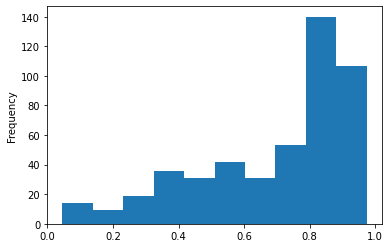

In [316]:
dfa['sigmaA'].plot(kind='hist')

In [129]:
# dfa['lowSelfWorth'].plot(kind='hist')

In [130]:
# dfa['lackSelfControl'].plot(kind='hist')